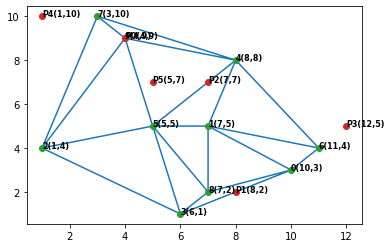

FileNotFoundError: [Errno 2] No such file or directory: 'HARI SETIAWAN_dt01.txt'

In [23]:
# 2019 4월 it works.

import numpy as np
import matplotlib.pyplot as plt
import random as rand
from scipy.spatial import Delaunay

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
x = 0
y = 1

def isOnVertex(inputs, t):
    for vertex in inputs:
        if t[x] == points[vertex,x] and t[y] == points[vertex,y]:
            return vertex
    return -1
def isOnEdge(edges, t):
    for edge in edges:
        a = points[edge[0],x] * (t[y] - points[edge[1],y]) + t[x] * (points[edge[1],y] - points[edge[0],y]) + points[edge[1],x] * (points[edge[0],y] - t[y]) 
        if a == 0:
            return edge
    return -1

def isInside(inputs, t):
    crossing = 0
    px = t[x]
    py = t[y]
    size = 3
    for i in range(0,len(inputs)):
        if inputs[i][x] < inputs[(i+1)%size][x]:
            x1 = inputs[i][x]
            x2 = inputs[(i+1)%size][x]
        else:
            x1 = inputs[(i+1)%size][x]
            x2 = inputs[i][x]

        if px > x1 and px <= x2 and (py < inputs[i][y] or py <= inputs[(i+1)%size][y]):
            eps = 0.000001
            dx = inputs[(i+1)%size][x] - inputs[i][x];
            dy = inputs[(i+1)%size][y] - inputs[i][y];

            if abs(dx) < eps:
                k = 10000000
            else:
                k = dy/dx

            m = inputs[i][y] - k * inputs[i][x]

            y2 = k * px + m
            if py <= y2:
                crossing += 1
    if crossing%2 == 1:
        return True
    else:
        return False

filetargets = ['points1', 'HARI SETIAWAN_dt01', 'HARI SETIAWAN_dt02']

for filetarget in filetargets:
    filepath = filetarget+'.txt'
    fileout = filetarget+'_out.txt'
    with open(filepath) as f:
        lines = f.read().splitlines()

        intersect = []
        point_range = int(lines[0])
        polygons = lines[1:point_range]
        targets = lines[point_range+2:]
        points = []
        target_point = []
        all_point = []
        
        for i in polygons:
            temp = i.split(" ")
            points.append([temp[0],temp[1]])
            all_point.append([temp[0],temp[1]])
        for i in targets:
            temp = i.split(" ")
            target_point.append([temp[0],temp[1]])
            all_point.append([temp[0],temp[1]])

        target_point = np.asarray(target_point).astype(int)
        points = np.asarray(points).astype(int)
        all_point = np.asarray(all_point).astype(int)
    for i in range(len(points)) :
        ptxt =  str(i) + "(" + str(points[i][0]) + "," + str(points[i][1]) + ")"
        plt.annotate( ptxt, (points[i][0], points[i][1]), fontsize=8, fontweight='bold' )
    for i in range(len(target_point)) :
        ptxt =  "P"+str(i) + "(" + str(target_point[i][0]) + "," + str(target_point[i][1]) + ")"
        plt.annotate( ptxt, (target_point[i][0], target_point[i][1]), fontsize=8, fontweight='bold' )



    tri = Delaunay(points)

    with open(fileout, "a") as myfile:
        for t in target_point:
            inside = False
            for p in tri.simplices :
                edges = []
                edges.append([p[0],p[1]])
                edges.append([p[1],p[2]])
                edges.append([p[0],p[2]])

                on_vertex = isOnVertex(p, t)
                #CHECK IF ON VERTEX
                if on_vertex != -1:
                    inside = True
                    myfile.write(' '.join(t.astype(str)))
                    myfile.write('vertex ['+str(on_vertex)+']')
                    myfile.write('\r\n')
                    break
                    
                #CHECK IF ON EDGE
                on_edge = isOnEdge(edges, t)
                if on_vertex != -1:
                    inside = True
                    myfile.write(' '.join(t.astype(str)))
                    myfile.write('edge ['+str(on_edge)+']')
                    myfile.write('\r\n')
                    break
                    
                #CHECK IF IN AREA
                if isInside(points[p], t):
                    inside = True
                    myfile.write(' '.join(t.astype(str)))
                    myfile.write('face ['+str(p)+']')
                    myfile.write('\r\n')
                    break
                    
            if not inside:
                myfile.write(' '.join(t.astype(str)))
                myfile.write('Outside []')
                myfile.write('\r\n')
        myfile.close()



    plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
    plt.plot(points[:,0], points[:,1], 'o')
    plt.plot(target_point[:,0], target_point[:,1], 'o')  #Plot the intersecting line
    plt.show()